https://www.kaggle.com/datasets/n0n5ense/global-maritime-pirate-attacks-19932020?select=pirate_attacks.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Basemap
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import seaborn

In [2]:
pirates = pd.read_csv('pirate_attacks.csv')
codes = pd.read_csv('country_codes.csv')
indicators = pd.read_csv('country_indicators.csv')

### DATASETS DESCRIPTION:

#### 1. Pirates:
- date: Date of Attack. Used as a key with the Country Matrix data frame.
- time: Time the attack took place, either in UTC or Local Time
- longitude and latitude: Longitude and latitude where the attack took place.
- attack_type: Either NA (Missing), Attempted, Boarding, or Hijacked.
- location_description: A text description of the location. With attacks taking place at sea, it is not as simple as just naming a city or town.
- nearest_country: The country code whose shore is closest to the attack. The resolution is around 1 km.
- eez_country: The Exclusive Economic Zone country code in which the attack took place, if it took place within an EEZ
- shore_distance: Distance in kilometres to the shore from the attack location. This is the true geographic distance over the surface of the earth.
- shore_latitude and shore_longitude: The latitude and longitude of the closest point on the shore to the attack.
- attack_description: The text description of the attack if it exists.
- vessel_name: The name of the ship which was attacked if it is known
- vessel_type: The type of vessel attacked if known.
- vessel_status: The status of the ship at the time it was attacked. Either NA (Missing), Berthed (Tied to a berth), Anchored (anchored at sea or in a harbour), or Steaming (ship underway).
- data_source: imp - International Maritime Bureau

#### 2. Indicators:
- country: The country in ISO3 country code format.
- year: The year the attack took place
- corruption_index: Corruption Perceptions Index.
- homicide_rate: Total Intentional Homicides per 100,000 people.
- GPD: Gross Domestic Product (US Dollars).
- total_fisheries_per_ton: Total Fisheries Production (metric tons).
- total_military: Total Number of Armed Forces personnel.
- population: Country Population.
- unemployment_rate: Percentage of the Country Unemployed.
- totalgr: Total Government Revenue. An indication of how well the country collects taxes.
- industryofgdp: Industrial contribution to total GDP.

#### 3. Codes:
- country: The country in ISO3 country code format.
- region: The region the country is in.
- country_name: The English country name.

In [3]:
round((pirates.isnull().sum()/len(pirates.date))*100, 2)

date                     0.00
time                    84.70
longitude                0.00
latitude                 0.00
attack_type              1.60
location_description     0.11
nearest_country          0.25
eez_country              3.93
shore_distance           0.00
shore_longitude          0.00
shore_latitude           0.00
attack_description      84.38
vessel_name             19.07
vessel_type             84.38
vessel_status           12.14
data_source              0.00
dtype: float64

In [4]:
round((indicators.isnull().sum()/len(indicators.year))*100, 2)

country                     0.00
year                        0.58
corruption_index           42.75
homicide_rate              42.02
GDP                         8.82
total_fisheries_per_ton    15.39
total_military             29.94
population                  0.70
unemployment_rate          14.31
totalgr                    30.17
industryofgdp              17.36
dtype: float64

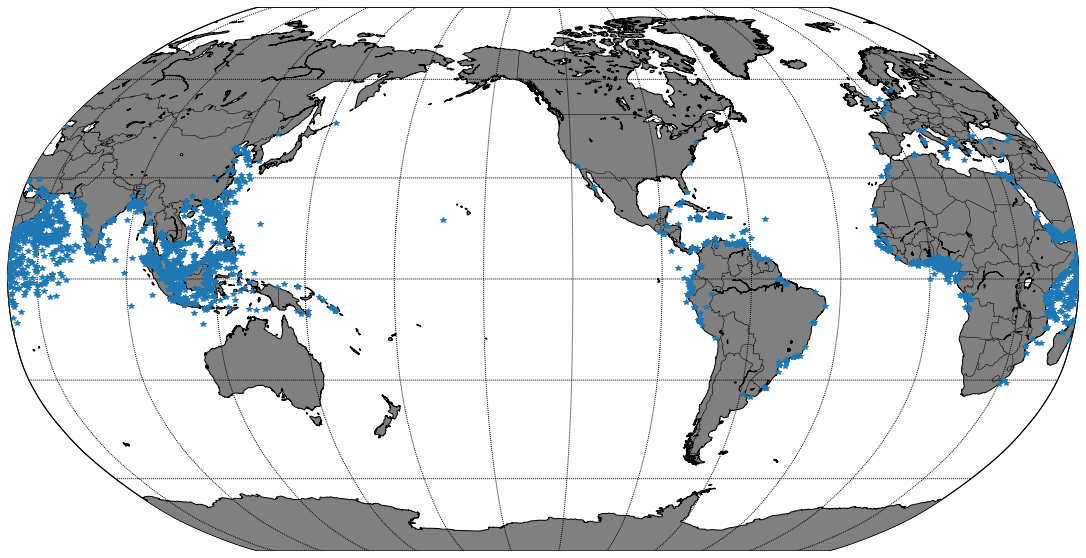

In [53]:
lats, lons = list(pirates['latitude']), list(pirates['longitude'])
figu, ax = plt.subplots(figsize=(20,10))
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))

## Coordenadas a posiciones
x,y = eq_map(lons, lats)
eq_map.plot(x, y, '*', markersize=6)
 
plt.show()

Para hacer zoom sobre una zona podemos modificar la latitud_0 y longitud_0 y así encontrar los puntos de interés.

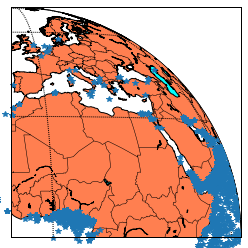

In [6]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
# global ortho map centered on lon_0,lat_0
lat_0=0.1 #10
lon_0=-10 #57
# altitude of camera (in km).
h = 10000
# resolution = None means don't process the boundary datasets.
m1 = Basemap(projection='nsper',satellite_height=h*10000, lon_0=lon_0, lat_0=lat_0, resolution=None)  #projection = 'nsper'

# add an axes with a black background
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# plot just upper right quadrant (corners determined from global map).
# keywords llcrnrx,llcrnry,urcrnrx,urcrnry used to define the lower
# left and upper right corners in map projection coordinates.
# llcrnrlat,llcrnrlon,urcrnrlon,urcrnrlat could be used to define
# lat/lon values of corners - but this won't work in cases such as this
# where one of the corners does not lie on the earth.
m = Basemap(projection='nsper',satellite_height=h*10000,   #projection = 'nsper'
        lon_0=lon_0, lat_0=lat_0, resolution='l',
    llcrnrx=0, llcrnry=0, urcrnrx=m1.urcrnrx/2, urcrnry=m1.urcrnry/2)
m.drawcoastlines()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral',lake_color='aqua')
m.drawcountries()
# draw parallels and meridians.
m.drawparallels(np.arange(-90,120,30))
m.drawmeridians(np.arange(0,360,60))
m.drawmapboundary()

x,y = m(lons, lats)
m.plot(x, y, '*', markersize=6)

plt.show()

- *Saltelite height* nos dice la altura la que está situado el satelite: cuando mayor sea, menos zoom estaremos haciendo.
- *Altitud de la camara* (h): altura de la camara (modifica tambien la altura del satelite).
- *projection*: nos sirve para hacer zoom sobre una zona: nsper zoom - robin mapa global

## PROCESADO DE DATOS
Vamos a extraer el año de la columna date del dataset pirates para poder unirlo al dataset country_indicators. También vamos a cambiar el nombre de neares_country para poder hacer el merge.

In [3]:
pirates['date'] = pd.to_datetime(pirates.date.values)
pirates['year'] = pirates['date'].dt.year 
pirates = pirates.rename(columns={'nearest_country':'country'})
pirates.head()

,date,time,longitude,latitude,attack_type,location_description,country,eez_country,shore_distance,shore_longitude,shore_latitude,attack_description,vessel_name,vessel_type,vessel_status,data_source,year
0,1993-01-02,NaN,116.9667,19.700000,NaN,Hong Kong - Luzon - Hainan,CHN,TWN,357.502373,115.825956,22.746644,NaN,Mv Cosmic Leader,NaN,NaN,mappingpiracy,1993
1,1993-01-04,NaN,116.0000,22.350000,NaN,Hong Kong - Luzon - Hainan,CHN,CHN,47.431573,115.825956,22.746644,NaN,Mv Tricolor Star III,NaN,NaN,mappingpiracy,1993
2,1993-01-06,NaN,115.2500,19.670000,NaN,Hong Kong - Luzon - Hainan,CHN,TWN,280.811871,114.302501,22.044867,NaN,Mv Arktis Star,NaN,NaN,mappingpiracy,1993
3,1993-01-08,NaN,124.5833,29.900000,NaN,East China Sea,CHN,CHN,209.923396,122.409679,29.911200,NaN,Ussurijsk,NaN,NaN,mappingpiracy,1993
4,1993-01-12,NaN,120.2667,18.133333,NaN,Hong Kong - Luzon - Hainan,PHL,PHL,22.027332,120.470063,18.091010,NaN,Mv Chennai Nermai,NaN,NaN,mappingpiracy,1993


Vamos a sustituir los datos faltantes en el dataset indicators, ya que como hemos visto anteriormente el porcentaje en algunas de las variables es elevado.

In [4]:
#homicide_rate
mean = indicators[['country','homicide_rate']].groupby('country').mean()
indicators = indicators.drop(['homicide_rate'], axis=1)
indicators = indicators.merge(mean, on=['country'])
indicators['homicide_rate'].fillna(indicators['homicide_rate'].median(), inplace=True) 

#corruption_index
mean = indicators[['country','corruption_index']].groupby('country').mean()
indicators = indicators.drop(['corruption_index'], axis=1)
indicators = indicators.merge(mean, on=['country'])
indicators['corruption_index'].fillna(indicators['corruption_index'].median(), inplace=True) 

#GDP
mean = indicators[['country','GDP']].groupby('country').mean()
indicators = indicators.drop(['GDP'], axis=1)
indicators = indicators.merge(mean, on=['country'])
indicators['GDP'].fillna(indicators['GDP'].median(), inplace=True) 

#total_fisheries_per_ton
mean = indicators[['country','total_fisheries_per_ton']].groupby('country').mean()
indicators = indicators.drop(['total_fisheries_per_ton'], axis=1)
indicators = indicators.merge(mean, on=['country'])
indicators['total_fisheries_per_ton'].fillna(indicators['total_fisheries_per_ton'].median(), inplace=True) 

#total_military
mean = indicators[['country','total_military']].groupby('country').mean()
indicators = indicators.drop(['total_military'], axis=1)
indicators = indicators.merge(mean, on=['country'])
indicators['total_military'].fillna(indicators['total_military'].median(), inplace=True) 

#population
mean = indicators[['country','population']].groupby('country').mean()
indicators = indicators.drop(['population'], axis=1)
indicators = indicators.merge(mean, on=['country'])
indicators['population'].fillna(indicators['population'].median(), inplace=True) 

#unemployment_rate
mean = indicators[['country','unemployment_rate']].groupby('country').mean()
indicators = indicators.drop(['unemployment_rate'], axis=1)
indicators = indicators.merge(mean, on=['country'])
indicators['unemployment_rate'].fillna(indicators['unemployment_rate'].median(), inplace=True) 

#totalgr
mean = indicators[['country','totalgr']].groupby('country').mean()
indicators = indicators.drop(['totalgr'], axis=1)
indicators = indicators.merge(mean, on=['country'])
indicators['totalgr'].fillna(indicators['totalgr'].median(), inplace=True) 

#industryofgdp
mean = indicators[['country','industryofgdp']].groupby('country').mean()
indicators = indicators.drop(['industryofgdp'], axis=1)
indicators = indicators.merge(mean, on=['country'])
indicators['industryofgdp'].fillna(indicators['industryofgdp'].median(), inplace=True) 

In [14]:
round((indicators.isnull().sum()/len(indicators.year))*100, 2)

country                    0.00
year                       0.58
homicide_rate              0.00
corruption_index           0.00
GDP                        0.00
total_fisheries_per_ton    0.00
total_military             0.00
population                 0.00
unemployment_rate          0.00
totalgr                    0.00
industryofgdp              0.00
dtype: float64

In [39]:
df = pirates.merge(indicators, on=['country', 'year'], how='left')

In [16]:
round((df.isnull().sum()/len(df.year))*100, 2)

date                        0.00
time                       84.70
longitude                   0.00
latitude                    0.00
attack_type                 1.60
location_description        0.11
country                     0.25
eez_country                 3.93
shore_distance              0.00
shore_longitude             0.00
shore_latitude              0.00
attack_description         84.38
vessel_name                19.07
vessel_type                84.38
vessel_status              12.14
data_source                 0.00
attack_type_code            0.00
year                        0.00
homicide_rate               3.01
corruption_index            3.01
GDP                         3.01
total_fisheries_per_ton     3.01
total_military              3.01
population                  3.01
unemployment_rate           3.01
totalgr                     3.01
industryofgdp               3.01
dtype: float64

Vamos a eliminar las instancias en las que haya datos faltantes de las variables GDP, homicide_rate, etc (indicators) y que tengan faltantes en la variable a predecir, attack_type

In [40]:
df = df.dropna(subset = ['homicide_rate', 'attack_type', 'vessel_status'])

In [18]:
round((df.isnull().sum()/len(df.year))*100, 2)

date                        0.00
time                       91.02
longitude                   0.00
latitude                    0.00
attack_type                 0.00
location_description        0.08
country                     0.00
eez_country                 4.15
shore_distance              0.00
shore_longitude             0.00
shore_latitude              0.00
attack_description         90.83
vessel_name                12.31
vessel_type                90.83
vessel_status               0.00
data_source                 0.00
attack_type_code            0.00
year                        0.00
homicide_rate               0.00
corruption_index            0.00
GDP                         0.00
total_fisheries_per_ton     0.00
total_military              0.00
population                  0.00
unemployment_rate           0.00
totalgr                     0.00
industryofgdp               0.00
dtype: float64

Vamos a codificar las variables categóricas que queremos usar para nuestro modelo.

In [7]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()
le.fit(df.vessel_status)
df['vessel_status'] = le.transform(df.vessel_status)

le2.fit(df.eez_country)
df['eez_country'] = le2.transform(df.eez_country)

le3.fit(df.attack_type)
df['attack_type_code'] = le3.transform(df.attack_type)

In [8]:
#for visualization
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(indicators.country)
indicators['country_code'] = le.transform(indicators.country)

## DATA VISUALIZATION

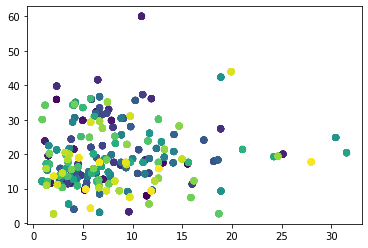

In [39]:
plt.scatter(indicators.unemployment_rate, indicators.corruption_index, c=indicators.country_code, alpha=0.5)
plt.show()

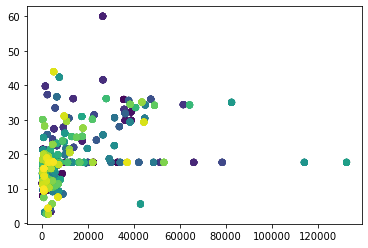

In [40]:
plt.scatter(indicators.GDP, indicators.corruption_index, c=indicators.country_code, alpha=0.5)
plt.show()

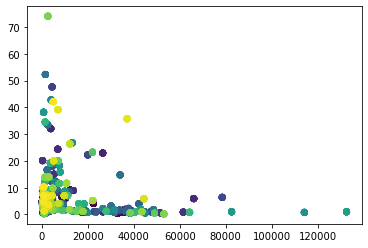

In [41]:
plt.scatter(indicators.GDP, indicators.homicide_rate, c=indicators.country_code, alpha=0.5)
plt.show()

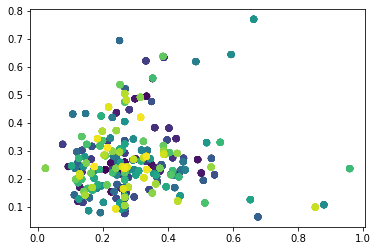

In [42]:
plt.scatter(indicators.totalgr, indicators.industryofgdp, c=indicators.country_code, alpha=0.5)
plt.show()

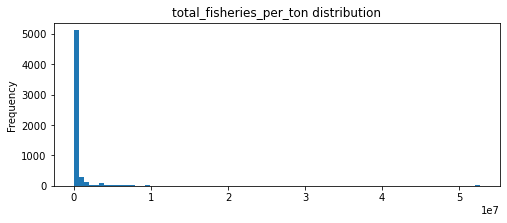

In [26]:
#deleting outliers for correcct visualization
fig, ax = plt.subplots(figsize=(8, 3))
indicators.total_fisheries_per_ton.plot.hist(bins=80, ax=ax)
ax.set_title('total_fisheries_per_ton distribution');

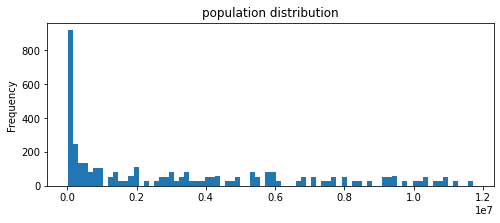

In [90]:
#deleting outliers for correcct visualization
fig, ax = plt.subplots(figsize=(8, 3))
indicators.loc[indicators.population < 1.253690e+07].population.plot.hist(bins=80, ax=ax)
ax.set_title('population distribution');

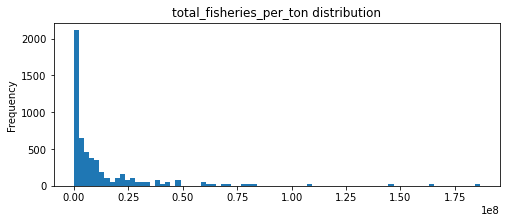

In [38]:
#deleting outliers for correcct visualization
fig, ax = plt.subplots(figsize=(8, 3))
indicators.loc[indicators.total_fisheries_per_ton < 2e+06].population.plot.hist(bins=80, ax=ax)
ax.set_title('total_fisheries_per_ton distribution');

In [9]:
round((df.isnull().sum()/len(df.year))*100, 2)

date                        0.00
time                       91.02
longitude                   0.00
latitude                    0.00
attack_type                 0.00
location_description        0.08
country                     0.00
eez_country                 0.00
shore_distance              0.00
shore_longitude             0.00
shore_latitude              0.00
attack_description         90.83
vessel_name                12.31
vessel_type                90.83
vessel_status               0.00
data_source                 0.00
year                        0.00
homicide_rate               0.00
corruption_index            0.00
GDP                         0.00
total_fisheries_per_ton     0.00
total_military              0.00
population                  0.00
unemployment_rate           0.00
totalgr                     0.00
industryofgdp               0.00
attack_type_code            0.00
dtype: float64

# MODELS

In [9]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [10]:
# Create training and test split
X = df.drop(['attack_type', 'time', 'location_description', 'date', 'country', 'attack_description', 'vessel_name', 'vessel_type', 'data_source'], axis = 1)
y = df['attack_type']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### SVM

In [ ]:
# Sklearn modules & classes
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC

svc = SVC(C=1.0, random_state=1, kernel='linear')
svc.fit(x_train, y_train)
y_predict = svc.predict(x_test)
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

### NEURAL NETWORKS

In [24]:
from sklearn.neural_network import MLPClassifier

model1 = MLPClassifier(hidden_layer_sizes=(5), learning_rate_init=0.01, solver = 'lbfgs', max_iter = 1000, random_state = 123)
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_pred))

Accuracy score 0.000


C:\Users\lcgsa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [51]:
model2 = MLPClassifier(
                hidden_layer_sizes=(10),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_pred))

Accuracy score 0.453


C:\Users\lcgsa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [31]:
model4 = MLPClassifier(hidden_layer_sizes=(50, 50, 50),learning_rate_init=0.01,solver = 'lbfgs', max_iter = 5000, random_state = 123)
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_pred))

Accuracy score 0.174


C:\Users\lcgsa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [53]:
model4 = MLPClassifier(hidden_layer_sizes=(50, 50, 50),learning_rate_init=0.01,solver = 'lbfgs', max_iter = 5000, random_state = 123)
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_pred))

Accuracy score 0.453


C:\Users\lcgsa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Como podemos observar, no hemos obtenido buenos resultados utilizando redes neuronales para nuestros datos.

### DECISION TREE

In [26]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_pred))

Accuracy score 0.683


### NAIVE BAYES

In [32]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_pred))

Accuracy score 0.406


### RANDOM FOREST

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
y_pred = clf.predict(x_test)
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_pred))

Accuracy score 0.579


In [8]:
#ELIMINAR ANTES DE ENTREGAR
indicators.to_csv('indicators_transformed.csv', index=False)
df.to_csv('general_transformed.csv', index=False)